<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_S24/blob/master/05_01_Lorenz_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dynamical Systems: 1 - Lorenz System**

The code from the textbook [1] was modified to run on Google Colab.

[1] https://github.com/kursatkara/databook_python/blob/master/CH07/CH07_SEC01_SimulateLorenz.ipynb

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate

rcParams.update({'font.size': 11})
plt.rcParams['figure.figsize'] = [8, 8]

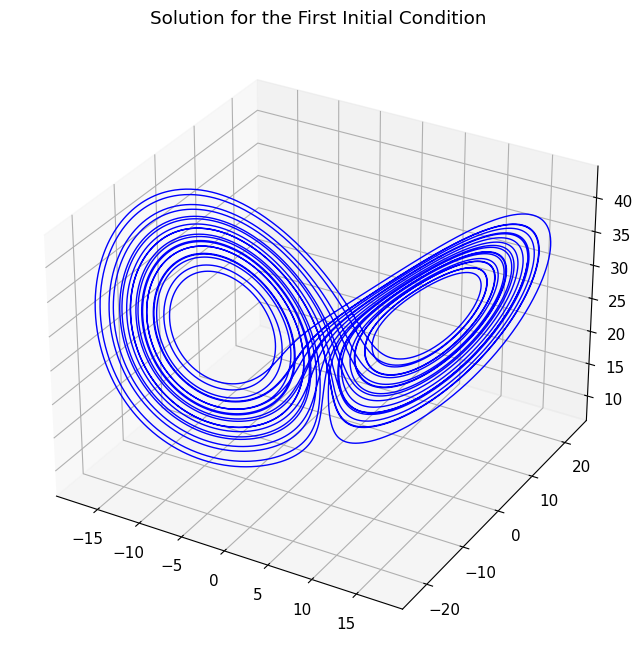

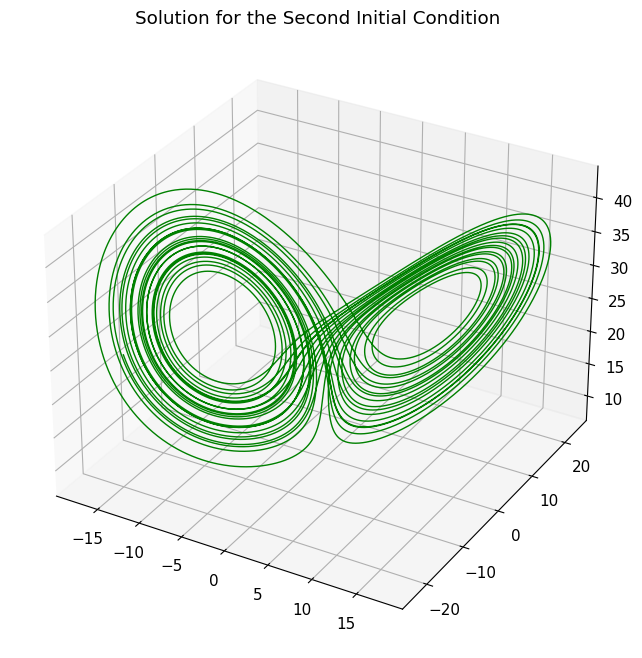

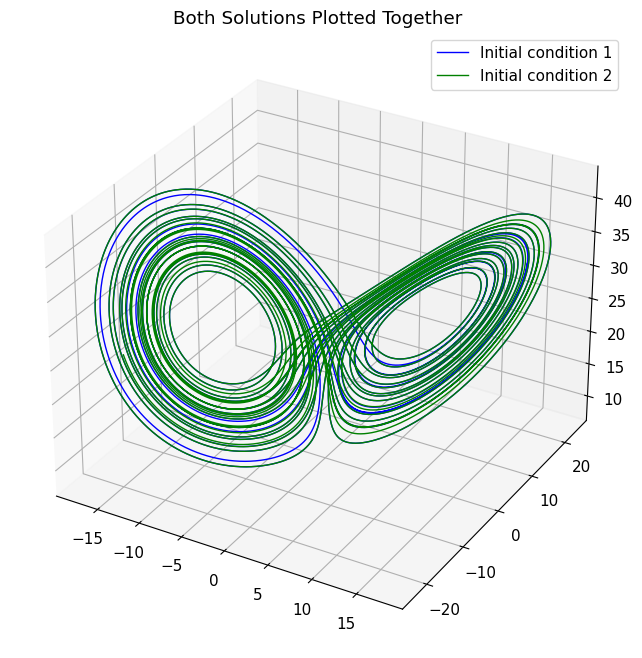

In [18]:
# Define constants and time vector
dt = 0.001
T = 30
t = np.arange(0, T + dt, dt)
beta = 8 / 3
sigma = 10
rho = 28

# Define the Lorenz system
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Initial conditions
x0 = np.array([0, 1, 20])
x1 = x0 + np.array([1e-10, 0, 0])  # Very close initial condition

x_t0 = integrate.odeint(lorenz_deriv, x0, t,rtol=10**(-12),atol=10**(-12)*np.ones_like(x0))
x_t1 = integrate.odeint(lorenz_deriv, x1, t,rtol=10**(-12),atol=10**(-12)*np.ones_like(x0))

# Extract solutions
x0, y0, z0 = x_t0.T
x1, y1, z1 = x_t1.T

# 1. Solution for the first initial condition
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x0, y0, z0, 'b-', linewidth=1)
ax.set_title("Solution for the First Initial Condition")
plt.show()

# 2. Solution for the second initial condition
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, y1, z1, 'g-', linewidth=1)
ax.set_title("Solution for the Second Initial Condition")
plt.show()

# 3. Solutions of both plotted together
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x0, y0, z0, 'b-', linewidth=1, label='Initial condition 1')
ax.plot(x1, y1, z1, 'g-', linewidth=1, label='Initial condition 2')
ax.set_title("Both Solutions Plotted Together")
ax.legend()
plt.show()
